In [2]:
import numpy as np
import random
import cvxopt
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.dates as mdates

In [3]:
import matplotlib as mpl 
from matplotlib.font_manager import fontManager
fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

In [2]:
x = np.zeros((60,2))
y = np.zeros(60)

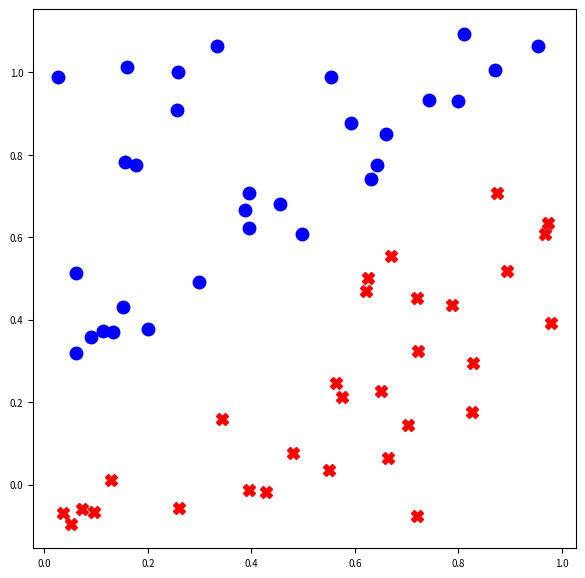

In [55]:
for i in range(0, 60):
    f = 0.1
    if i < 30:
        y[i] = 1
        x[i, 0] = random.random()
        x[i, 1] = random.uniform(x[i, 0], 1) + f
    else:
        y[i] = -1
        x[i, 0] = random.random()
        x[i, 1] = random.uniform(0, x[i, 0]) - f

plt.rcParams['figure.figsize'] = (7,7)
plt.plot(x[:30, 0], x[:30, 1], 'bo', markersize=9)
plt.plot(x[30:, 0], x[30:, 1], 'rX', markersize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()

     pcost       dcost       gap    pres   dres
 0:  2.9280e+00  5.3722e+01  2e+02  2e+00  3e+01
 1:  2.0889e+01  9.3309e+00  7e+01  6e-01  9e+00
 2:  2.5782e+01  1.5712e+01  7e+01  6e-01  8e+00
 3:  5.5192e+01  5.6117e+01  3e+01  2e-01  3e+00
 4:  7.4211e+01  7.1971e+01  1e+01  6e-02  8e-01
 5:  7.8627e+01  7.4430e+01  8e+00  2e-02  3e-01
 6:  8.0328e+01  8.0096e+01  4e-01  1e-03  2e-02
 7:  8.0442e+01  8.0440e+01  4e-03  1e-05  2e-04
 8:  8.0443e+01  8.0443e+01  4e-05  1e-07  2e-06
 9:  8.0443e+01  8.0443e+01  4e-07  1e-09  2e-08
Optimal solution found.


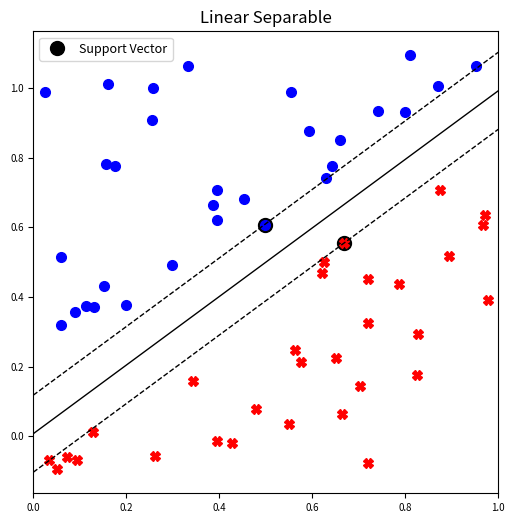

In [56]:
n_samples = 60

new_x = np.ones((60,3))
new_x[:,1:3] = x

new_xx = np.ones((60,3))
for i in range(0, 3):
    new_xx[:,i] = y*new_x[:,i]
    
QQ = np.diag(np.ones(3))
QQ[0,0] = 0

Q = cvxopt.matrix(QQ)
p = cvxopt.matrix(np.zeros(3))
G = cvxopt.matrix(-new_xx)
h = cvxopt.matrix(-np.ones(n_samples))

solution = cvxopt.solvers.qp(Q, p, G, h)
w = np.array(solution['x'])

temp = 100
up_index = 0
for i in range(0, 30):
    if temp > abs(new_x[i, :].dot(w)):
        temp = abs(new_x[i, :].dot(w))
        up_index=i

temp = 100
low_index = 0
for i in range(30, 60):
    if temp > abs(new_x[i, :].dot(w)):
        temp = abs(new_x[i, :].dot(w))
        low_index=i
        
#plt.rcParams['figure.figsize'] = (7, 7)

plt.figure(figsize=(6,6))

plt.plot([x[up_index, 0], x[low_index, 0]], [x[up_index, 1], x[low_index, 1]], 'ko', markersize=10, label='Support Vector')


plt.plot(x[:30, 0], x[:30, 1], 'bo', markersize=7)
plt.plot(x[30:, 0], x[30:, 1], 'rX', markersize=7)

m = -w[1]/w[2]
b = -w[0]/w[2]

b_up = x[up_index, 1]- m*x[up_index, 0]
b_low = x[low_index, 1]- m*x[low_index, 0]

plt.plot([0,1], [b, m+b],"k-", linewidth=1)
plt.plot([0,1], [b_up, m+b_up], "k--",linewidth=1)
plt.plot([0,1], [b_low, m+b_low], "k--",linewidth=1)

plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlim([0, 1])
plt.legend(prop={'size':9})
plt.title('Linear Separable')
plt.show()

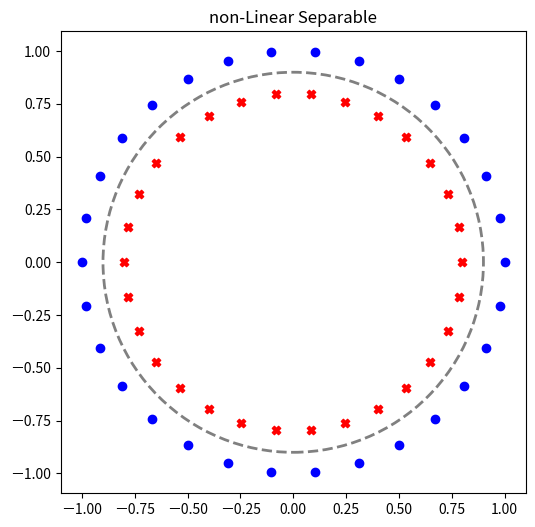

In [62]:
from sklearn.datasets import make_circles

x,y = make_circles(n_samples=60,noise=0,random_state=42)

plt.figure(figsize=(6,6))
plt.scatter(x[y==0, 0], x[y==0, 1], c='b', marker='o')
plt.scatter(x[y==1, 0], x[y==1, 1], c='r', marker='X')


circle = plt.Circle((0, 0), 0.9, color='gray', fill=False, linestyle='--', linewidth=2)
plt.gca().add_artist(circle)

plt.title('non-Linear Separable')
plt.show()

In [4]:
df1 = pd.read_csv('dftrain0420.csv')
df2 = pd.read_csv('dfvalid0420.csv')

In [5]:
dft, dfv = df1, df2

In [6]:
dft = dft.drop(['Unnamed: 0','土地位置建物門牌','交易年月日','建築完成年月',
             'new_date','address','longitude','latitude'],axis=1)

dfv = dfv.drop(['Unnamed: 0','土地位置建物門牌','交易年月日','建築完成年月',
             'new_date','address','longitude','latitude'],axis=1)

In [7]:
k=14999
print(df1['交易年月日'].iloc[k][:7], df1['new_date'].iloc[k])
print(df2['交易年月日'].iloc[k][:7], df2['new_date'].iloc[k])

2022-10 2022-10
2023-06 2023-06


In [8]:
df1, df2 = df1[['new_date','總價元']], df2[['new_date','總價元']] 
df1, df2 = df1.rename(columns={'總價元': 'Price'}), df2.rename(columns={'總價元': 'Price'})

In [9]:
df1.info() , df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66479 entries, 0 to 66478
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   new_date  66479 non-null  object 
 1   Price     66479 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15916 entries, 0 to 15915
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   new_date  15916 non-null  object 
 1   Price     15916 non-null  float64
dtypes: float64(1), object(1)
memory usage: 248.8+ KB


(None, None)

In [10]:
price1, price2 = df1.groupby('new_date')['Price'].mean(), df2.groupby('new_date')['Price'].mean() 

In [11]:
price1, price2

(new_date
 2020-01    785.981973
 2020-02    781.098663
 2020-03    759.783492
 2020-04    752.446232
 2020-05    777.111658
 2020-06    795.930489
 2020-07    825.784997
 2020-08    815.391030
 2020-09    828.537532
 2020-10    824.927886
 2020-11    816.399913
 2020-12    825.254946
 2021-01    845.611941
 2021-02    847.763902
 2021-03    842.147003
 2021-04    841.741314
 2021-05    850.236261
 2021-06    821.317050
 2021-07    855.267685
 2021-08    861.521171
 2021-09    878.361487
 2021-10    891.348047
 2021-11    867.093736
 2021-12    886.666657
 2022-01    862.929448
 2022-02    870.883476
 2022-03    886.672110
 2022-04    892.582296
 2022-05    890.475798
 2022-06    861.164156
 2022-07    885.289208
 2022-08    852.569105
 2022-09    906.970309
 2022-10    890.052780
 2022-11    871.028641
 2022-12    898.500711
 Name: Price, dtype: float64,
 new_date
 2023-01    919.804002
 2023-02    906.004096
 2023-03    952.708608
 2023-04    958.015782
 2023-05    939.927108
 2023-0

In [12]:
df = pd.concat([price1, price2])

In [13]:
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01', '2023-10-01', '2023-11-01'],
              dtype='datetime64[ns]', name='new_date', freq=None)

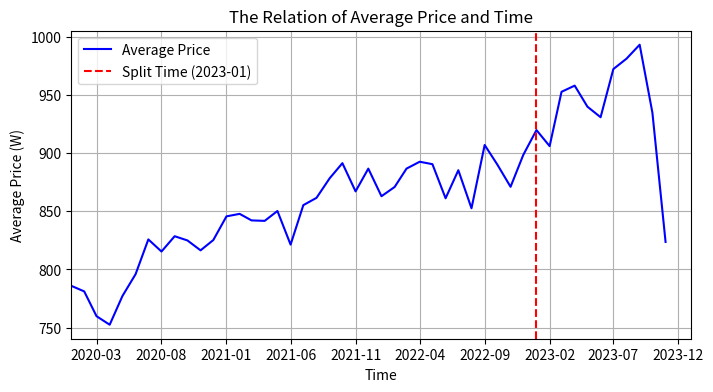

In [14]:
plt.figure(figsize=(8,4))
plt.plot(df.index, df.values, label='Average Price', color='blue')
plt.axvline(x=pd.to_datetime('2023-01'), linestyle='--', label='Split Time (2023-01)', color='red')

plt.title('The Relation of Average Price and Time')
plt.xlabel('Time')
plt.ylabel('Average Price (W)')

plt.grid(True)
plt.legend()

# 設定 x 軸的範圍
plt.xlim(pd.to_datetime('2020-01-01'), pd.to_datetime('2023-12-31'))

# 設定 x 軸的日期格式
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1, interval=5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.savefig('avg.png')
plt.show()

In [15]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66479 entries, 0 to 66478
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   鄉鎮市區           66479 non-null  int64  
 1   土地移轉總坪數        66479 non-null  float64
 2   都市土地使用分區       66479 non-null  int64  
 3   移轉層次           66479 non-null  int64  
 4   總樓層數           66479 non-null  int64  
 5   建物型態           66479 non-null  int64  
 6   主要建材           66479 non-null  int64  
 7   建物移轉總坪數        66479 non-null  float64
 8   建物現況格局-房       66479 non-null  int64  
 9   建物現況格局-廳       66479 non-null  int64  
 10  建物現況格局-衛       66479 non-null  int64  
 11  建物現況格局-隔間      66479 non-null  int64  
 12  有無管理組織         66479 non-null  int64  
 13  總價元            66479 non-null  float64
 14  主建物坪數          66479 non-null  float64
 15  附屬建物坪數         66479 non-null  float64
 16  陽台坪數           66479 non-null  float64
 17  土地數量           66479 non-null  int64  
 18  建物數量  

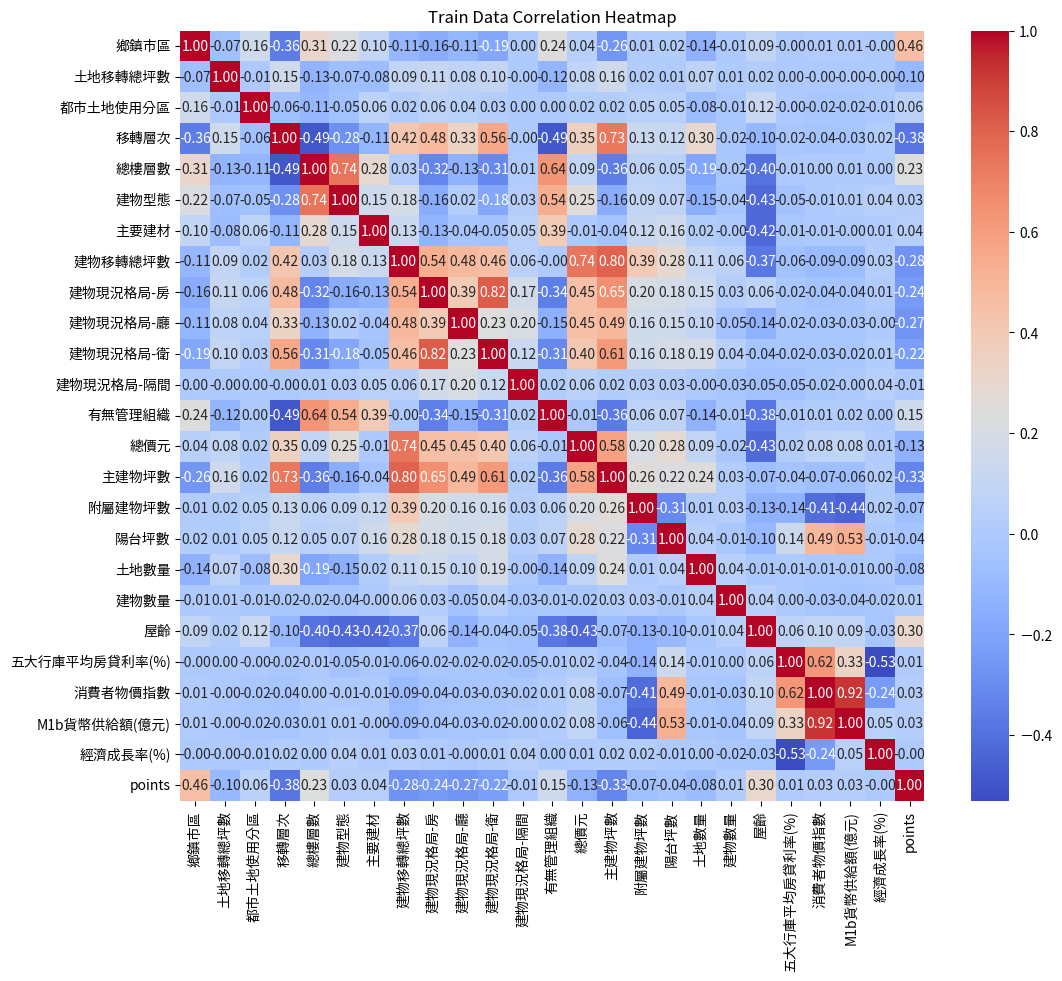

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(dft.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Train Data Correlation Heatmap')
plt.savefig('traincorr.png')
plt.show()

In [17]:
dft.corr()['總價元'].sort_values(ascending=False)

總價元              1.000000
建物移轉總坪數          0.742700
主建物坪數            0.581995
建物現況格局-廳         0.449987
建物現況格局-房         0.449909
建物現況格局-衛         0.403797
移轉層次             0.354108
陽台坪數             0.282945
建物型態             0.249225
附屬建物坪數           0.201187
總樓層數             0.094104
土地數量             0.088034
M1b貨幣供給額(億元)     0.082617
土地移轉總坪數          0.080914
消費者物價指數          0.076007
建物現況格局-隔間        0.056600
鄉鎮市區             0.039510
都市土地使用分區         0.022876
五大行庫平均房貸利率(%)    0.021975
經濟成長率(%)         0.009664
主要建材            -0.005621
有無管理組織          -0.014032
建物數量            -0.017368
points          -0.134926
屋齡              -0.425455
Name: 總價元, dtype: float64

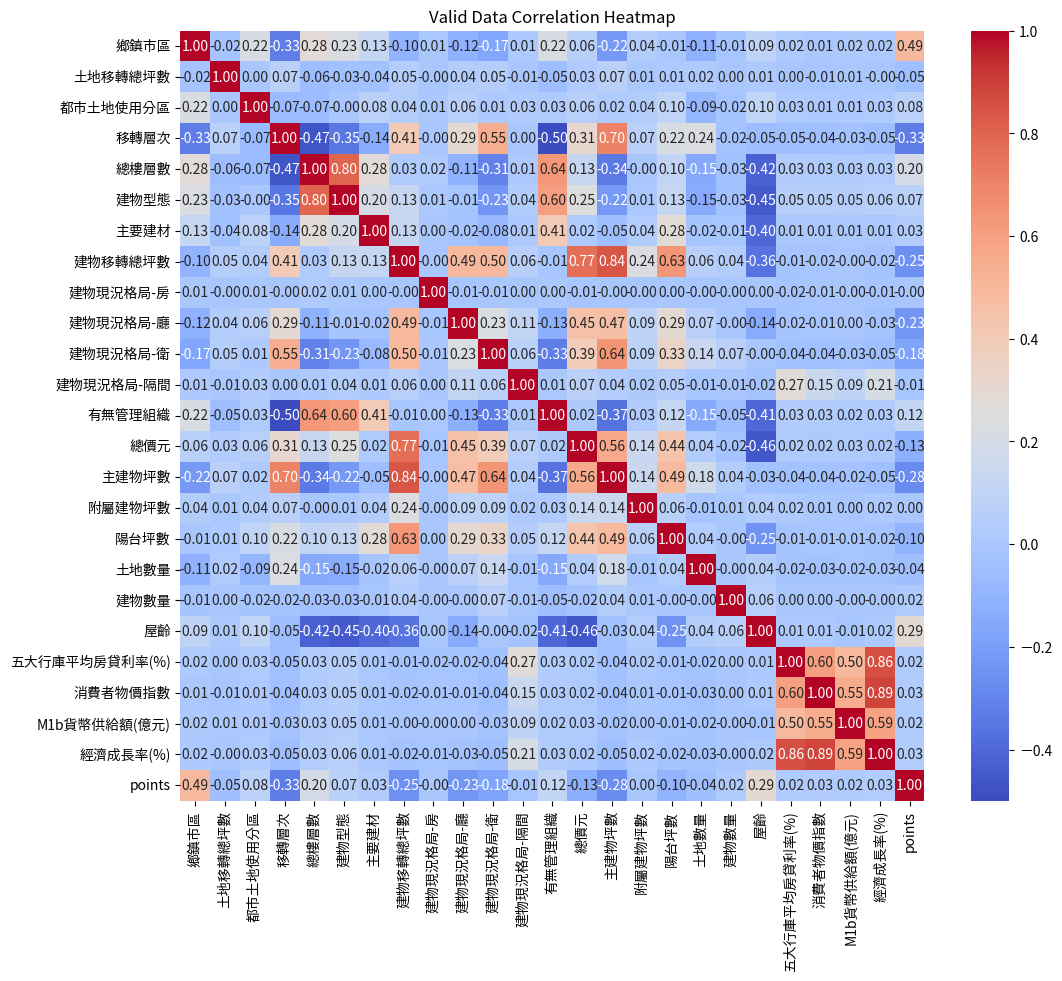

In [18]:
plt.figure(figsize=(12, 10))
sns.heatmap(dfv.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Valid Data Correlation Heatmap')
plt.savefig('validcorr.png')
plt.show()

In [177]:
url = "https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data.csv"
df = pd.read_csv(url)

In [178]:
d = df[df['YearsExperience'] >= 5]

In [179]:
d

,YearsExperience,Salary
19,5.1,66.0
20,5.3,83.0
21,5.9,81.3
22,6.0,93.9
23,6.8,91.7
24,7.1,98.2
25,7.9,101.3
26,8.2,113.8
27,8.7,109.4
28,9.0,105.5


In [181]:
d['Salary'].iloc[9] = 95

C:\Users\asd00\AppData\Local\Temp\ipykernel_8968\1978611985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Salary'].iloc[9] = 95


In [182]:
x = d['YearsExperience']
y = d['Salary']

In [183]:
w, b = 9.142528600076414, 27.885958900526827

In [190]:
yp=w*x+b
ypu=w*x+b-5
ypl=w*x+b+5

C:\Users\asd00\AppData\Local\Temp\ipykernel_8968\2170828438.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x,ypu,'k--',color='r')
C:\Users\asd00\AppData\Local\Temp\ipykernel_8968\2170828438.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x,ypl,'k--',color='r')


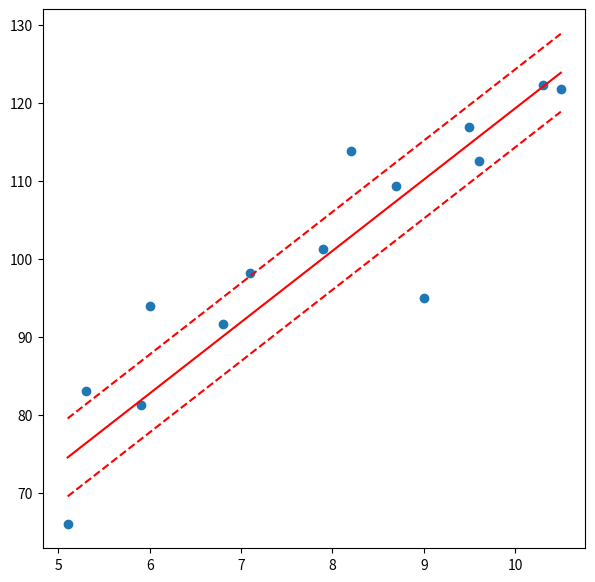

In [191]:
plt.scatter(x,y)
plt.plot(x,yp,color='red')
plt.plot(x,ypu,'k--',color='r')
plt.plot(x,ypl,'k--',color='r')
plt.show()

In [192]:
loc = pd.read_excel('111地標_final.xlsx')
loc = loc.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1)

In [193]:
loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6397 entries, 0 to 6396
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   地標大分類   6397 non-null   object 
 1   地標小分類   6397 non-null   object 
 2   地標名稱    6397 non-null   object 
 3   經度      6397 non-null   float64
 4   緯度      6397 non-null   float64
dtypes: float64(2), object(3)
memory usage: 250.0+ KB


In [194]:
loc['地標大分類'].value_counts()

地標大分類
便利商店      1373
公共設施      1156
文教機構      1045
醫療保健       950
金融機構       806
百貨公司       383
飯店(餐飲)     379
育樂場所       156
運輸服務       149
Name: count, dtype: int64

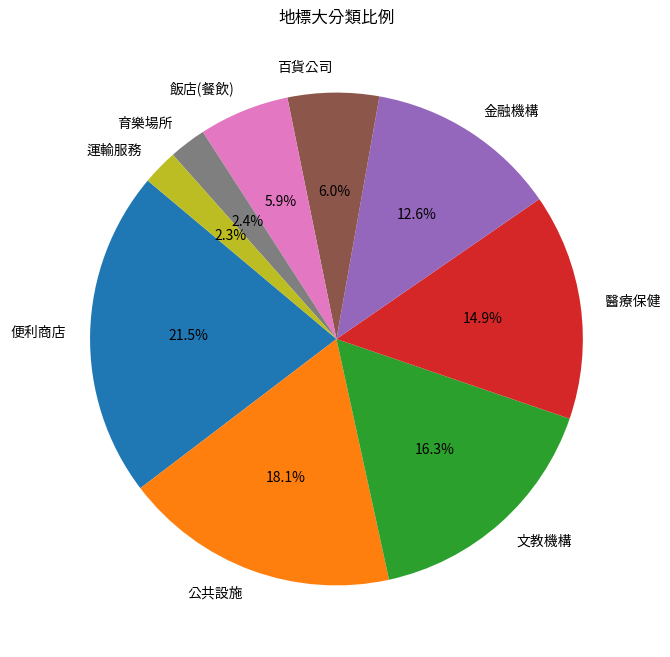

In [195]:
categories = ['便利商店', '公共設施', '文教機構', '醫療保健', '金融機構', '百貨公司', '飯店(餐飲)', '育樂場所', '運輸服務']
counts = [1373, 1156, 1045, 950, 806, 383, 379, 156, 149]

plt.figure(figsize=(8,8))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140)
#plt.axis('equal')  # 使圖形比例相等
plt.title('地標大分類比例')
plt.show()